In [1]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from gwpy.time import tconvert
from scipy.signal import find_peaks
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import pandas as pd

In [2]:
#set parameters
start_time = 1262217618  # Jan 5, 2020 - Jan 12, 2020
duration = 24*3600*8
channels = ['ETMX_Z','ITMY_Z','ETMY_Z','ETMX_X','ITMY_Y','ETMY_Y']
channelRMS = []

In [3]:
#get earthquake dataframe from file (in folder eqlockbit_getdata)
eqdatadf = pd.read_csv("./eqlockbit_getdata/eqdata_jan5-12_30M_100M.csv")

In [4]:
eqdatadf

,Unnamed: 0,ETMX_Z,ITMY_Z,ETMY_Z,ETMX_X,ITMY_Y,ETMY_Y
0,0,32.456500,24.644642,24.347350,77.458176,92.989850,99.544980
1,1,33.693638,28.780502,25.534544,95.691320,85.748250,92.297260
2,2,34.120407,29.417381,27.498201,111.474260,82.019650,88.653244
3,3,31.352415,28.739061,29.784079,104.624130,97.426090,114.552480
4,4,30.475208,28.414180,29.696924,97.604350,97.201960,114.349690
5,5,28.299820,25.873722,27.032804,94.331024,95.355280,103.180000
6,6,30.061472,24.444075,26.346863,90.015090,99.952736,108.933110
7,7,31.575165,25.547287,27.328926,91.483170,93.119850,102.412420
8,8,31.643888,26.166730,27.355438,100.251530,78.937230,88.368095
9,9,30.426647,24.292933,26.758871,98.932260,83.308740,88.604470


In [5]:
#get lockbit dataframe from file
lockbitdf = pd.read_csv("./eqlockbit_getdata/lbdata_jan5-12.csv")

In [7]:
lockbitdf

,Unnamed: 0,0
0,0,2000.0
1,1,2000.0
2,2,2000.0
3,3,2000.0
4,4,2000.0
5,5,2000.0
6,6,2000.0
7,7,2000.0
8,8,2000.0
9,9,2000.0


In [ ]:
%%time
#find time series for lockbit data
#Lockbit = TimeSeries.find('L1:GRD-ISC_LOCK_STATE_N.min',start_time, start_time + duration, frametype ='L1_M', verbose=True)

Reading L1_M frames: |▏         | 4/193 (  2%) ETA 30:27:36

In [9]:
#find unique values
lockbitdf.nunique()
#np.unique(Lockbit.value)

Unnamed: 0    11580
0                64
dtype: int64

<Figure size 864x576 with 0 Axes>

(100.0, 500.0)

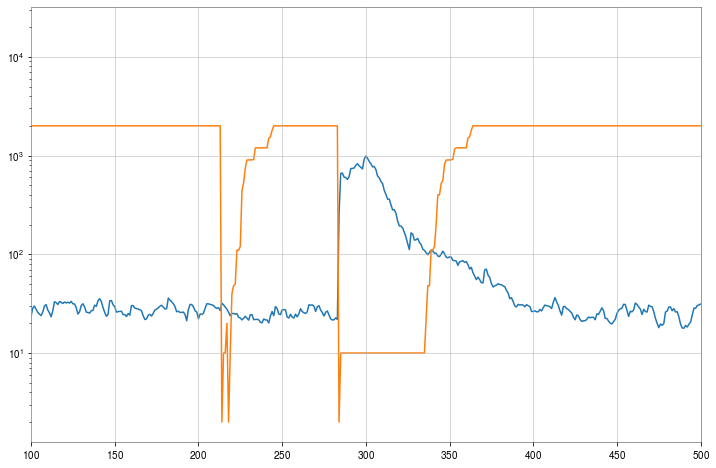

In [24]:
#plot lockbit value
plt.figure(figsize=(12,8))
t = range(len(eqdatadf['ETMX_Z']))
plt.plot(t, eqdatadf['ETMX_Z'].values)
plt.plot(t, lockbitdf['0'].values)
plt.yscale('log')
plt.xlim([100, 500])
plt.show()


In [19]:
plt.figure(figsize=(12,8))
t = range(len(channelRMS[0]))
plt.plot(t, channelRMS[0])
plt.plot(t, lockbitdf.value)
plt.yscale('log')
plt.show()

<Figure size 864x576 with 0 Axes>

IndexError: list index out of range

<Figure size 864x576 with 0 Axes>

In [20]:
#find peaks just using a threshold
peaks,_ = find_peaks(eqdatadf['ETMX_Z'],height = 100)
peaks

array([  286,   295,   300, ..., 10072, 10169, 10185])

<Figure size 864x576 with 0 Axes>

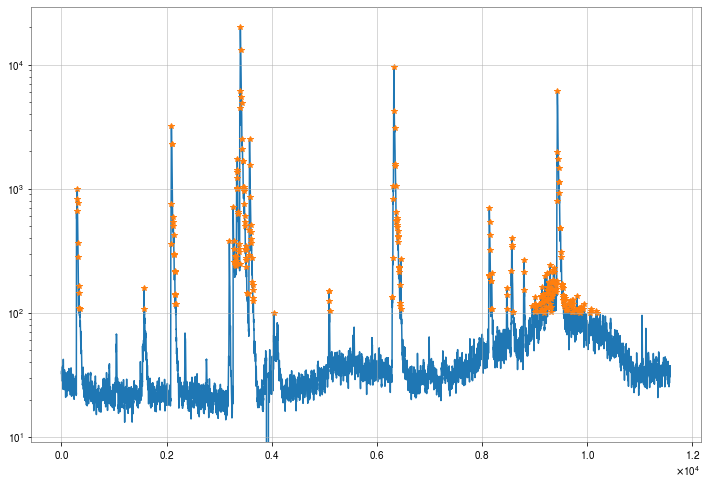

In [21]:
#plot peaks in earthquake data
plt.figure(figsize=(12,8))
plt.plot(eqdatadf['ETMX_Z'])
plt.plot(peaks, eqdatadf['ETMX_Z'][peaks],'*')
plt.yscale('log')
plt.show()

In [31]:
#find peaks using other parameters
peakwidth = 5
peakprom = 100
peakdist = 120
peaks,_ = find_peaks(eqdatadf['ETMX_Z'], width = peakwidth, distance = peakdist, prominence = peakprom)
peaks

array([ 300, 1570, 2091, 3266, 3403, 3577, 5087, 6322, 6453,
       8137, 8565, 8794, 9290, 9433])

<Figure size 864x576 with 0 Axes>

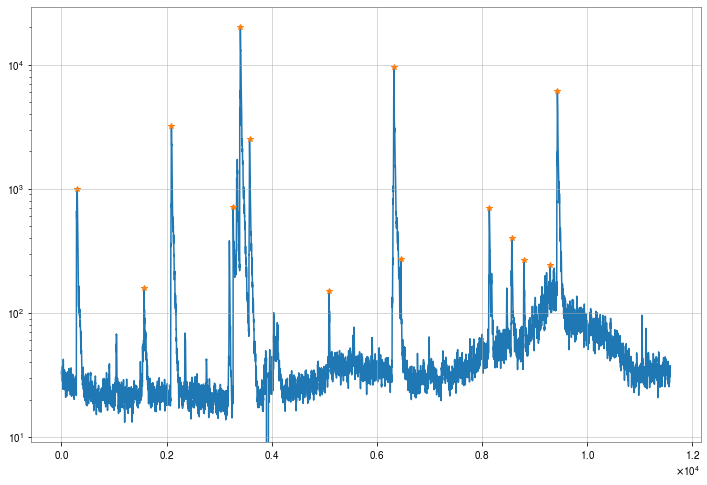

In [23]:
plt.figure(figsize=(12,8))
plt.plot(eqdatadf['ETMX_Z'])
plt.plot(peaks, eqdatadf['ETMX_Z'][peaks],'*')
plt.yscale('log') #nm/s
plt.show()

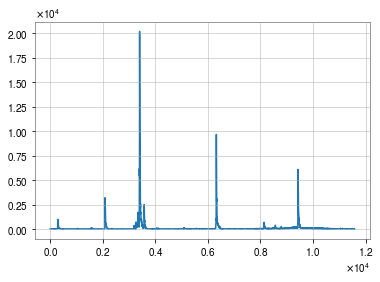

In [24]:
plt.plot(eqdatadf[channels[0]])

<Figure size 864x576 with 0 Axes>

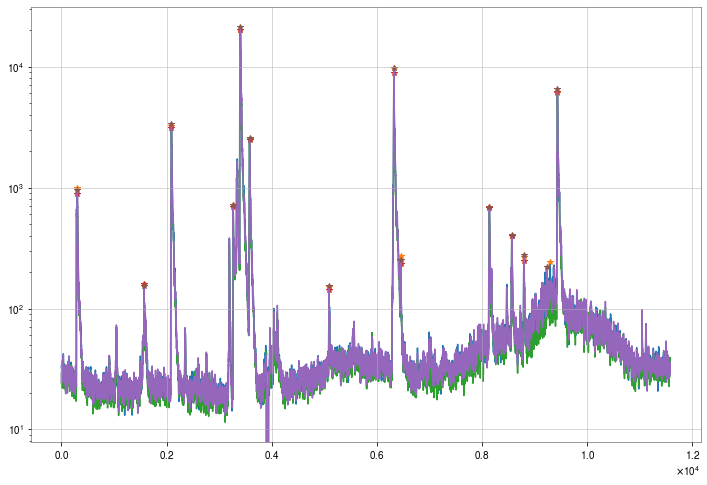

In [32]:
plt.figure(figsize=(12,8))
peaksRMSix = [] #location of local peaks in each Z- channel

for jj in range(3):
    peaksix,_ = find_peaks(eqdatadf[channels[jj]], width = peakwidth, distance = peakdist, prominence = peakprom)
    peaksRMSix.append(peaksix)
    plt.plot(eqdatadf[channels[jj]])
    plt.plot(peaksix, eqdatadf[channels[jj]][peaksix],'*')

plt.yscale('log')
plt.show()

In [33]:
peaksRMSix

[array([ 300, 1570, 2091, 3266, 3403, 3577, 5087, 6322, 6453,
        8137, 8565, 8794, 9290, 9433]),
 array([ 300, 1570, 2091, 3266, 3403, 3577, 5087, 6322, 6453,
        8137, 8565, 8794, 9433]),
 array([ 302, 1570, 2091, 3266, 3403, 3577, 5087, 6322, 6453,
        8137, 8565, 8795, 9228, 9433])]

(2800.0, 3200.0)

(0.0, 200.0)

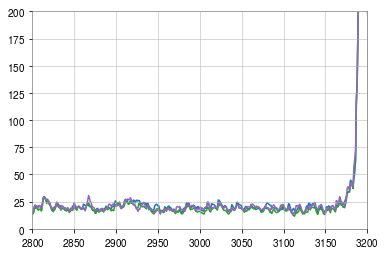

In [34]:
for jj in range (3):
    plt.plot(eqdatadf[channels[jj]])
    plt.plot(peaksRMSix[jj], eqdatadf[channels[jj]][peaksRMSix[jj]],'*')

plt.xlim([2800,3200])
plt.ylim([0,200])
plt.show()

In [35]:
#find common peaks in at least two of the three Z-channels, define those as EQs
EQix = []

EQix.append(np.intersect1d(peaksRMSix[0],peaksRMSix[1]))
EQix.append(np.intersect1d(peaksRMSix[1],peaksRMSix[2]))
EQix.append(np.intersect1d(peaksRMSix[2],peaksRMSix[0]))


EQix = np.unique(np.concatenate(EQix))
EQix

array([ 300, 1570, 2091, 3266, 3403, 3577, 5087, 6322, 6453,
       8137, 8565, 8794, 9433])

In [34]:
lockbitdf = pd.Series([])

In [35]:
lockbitdf.empty

True

In [36]:
delta = 20
jj=300
lockbitdf['0'][jj-delta:jj+delta]

280    2000.0
281    2000.0
282    2000.0
283    2000.0
284       2.0
285      10.0
286      10.0
287      10.0
288      10.0
289      10.0
290      10.0
291      10.0
292      10.0
293      10.0
294      10.0
295      10.0
296      10.0
297      10.0
298      10.0
299      10.0
300      10.0
301      10.0
302      10.0
303      10.0
304      10.0
305      10.0
306      10.0
307      10.0
308      10.0
309      10.0
310      10.0
311      10.0
312      10.0
313      10.0
314      10.0
315      10.0
316      10.0
317      10.0
318      10.0
319      10.0
Name: 0, dtype: float64

In [37]:
#find if detector survived EQ or lost lock status
survived = []
lostlock = []
delta = 20  #minutes - interval before and after EQ to define survival

for jj in EQix:
    if np.min(lockbitdf['0'][jj-delta:jj+delta])>=2000:
        survived.append(jj)
    else:
        lostlock.append(jj)

In [38]:
survived

[1570, 5087, 8565, 8794]

In [39]:
lostlock #peaks of earthquakes

[300, 2091, 3266, 3403, 3577, 6322, 6453, 8137, 9433]

In [44]:
#find times of lockloss within +/- delta of each event 
lostlockbit = []

for jj in lostlock:
    d0 = delta
    while lockbitdf['0'][jj-d0]>=2000:
        d0 = d0 - 1    
    lostlockbit.append(jj-d0)  #number we want to associate w eq

lostlockbit  # outputs first number we lost lock

[284, 2083, 3252, 3383, 3557, 6313, 6433, 8143, 9413]

In [45]:
lockbitdf['0'][lostlockbit]

284       2.0
2083      2.0
3252      2.0
3383     10.0
3557      9.0
6313      2.0
6433    400.0
8143      2.0
9413     10.0
Name: 0, dtype: float64

In [85]:
#create dataframe to store results
#lostlockdf = pd.DataFrame(np.transpose(lostlock), columns = [lostlock])
#lostlockdf

ValueError: Shape of passed values is (9, 1), indices imply (9, 9)

In [47]:
eqdatadf['ETMX_Z'][284]

256.87115

In [ ]:
# for lost lock, find max vertical and max horizontal

In [ ]:
# for survived, find max for both in whoel interval

In [ ]:
# do same for washington